In [16]:
import os
from pickle import dump
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.inception_v3 import preprocess_input
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
import glob
import numpy as np
from os import listdir

In [2]:
root_path="Z:/Flickr_Data/Flickr_Data/Images/"

path, dirs, imgs = next(os.walk(root_path))
imgs_count = len(imgs)
print("Number images: %d" % imgs_count)

Number images: 8092


First image: 1000268201_693b08cb0e.jpg


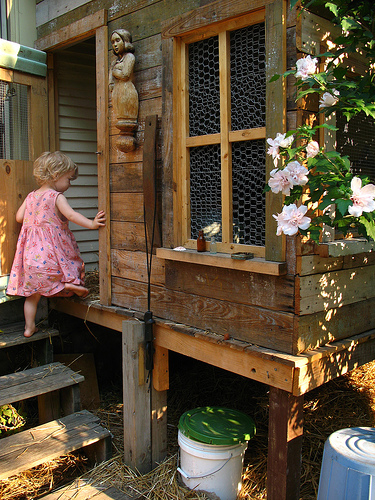

In [15]:
from keras.preprocessing.image import load_img
print("First image: %s" % imgs[0])
image = load_img(root_path + imgs[0])
image

In [10]:
from keras.preprocessing.image import img_to_array
image = img_to_array(image)
image.shape

(500, 375, 3)

In [11]:
from keras.applications.inception_v3 import preprocess_input
# reshape data into a single sample of an image
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
image.shape

(1, 500, 375, 3)

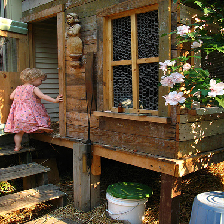

In [12]:
image = load_img(IMG_PATH+imgs[0], target_size=(224, 224))
image

In [38]:
# extract features from each photo in the directory
def extract_features(directory):
    # load the model
    model = InceptionV3(weights = 'imagenet')
    # re-structure the model
    model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
    # summarize
    print(model.summary())
    # extract features from each photo
    features = dict()
    
    for name in listdir(directory):
        
        if name.endswith('.db'):
            continue
        
        
        
        # load an image from file
        filename = directory + '/' + name
        image = load_img(filename, target_size=(299, 299))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # reshape data for the model
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        # prepare the image for the VGG model
        image /= 127.5
        image-=1
        # get features
        feature = model.predict(image, verbose=0)
        # print(feature.shape)
        feature = np.reshape(feature, feature.shape[1])
#         print(feature.shape,'updated')
        # get image id
        image_id = name
        # store feature
        features[image_id] = feature
        print('>%s' % name)
    return features


# extract features from all images
directory = root_path
features = extract_features(directory)
print('Extracted Features: %d' % len(features))
# save to file
dump(features, open('save/features.pkl', 'wb'))

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_941 (Conv2D)             (None, 149, 149, 32) 864         input_11[0][0]                   
__________________________________________________________________________________________________
batch_normalization_941 (BatchN (None, 149, 149, 32) 96          conv2d_941[0][0]                 
__________________________________________________________________________________________________
activation_941 (Activation)     (None, 149, 149, 32) 0           batch_normalization_941[0][0]    
___________________________________________________________________________________________